In [20]:
import wikipedia

In [21]:
wikipedia.search("Budapest")

['Budapest',
 'The Grand Budapest Hotel',
 'Budapest Memorandum on Security Assurances',
 'History of Budapest',
 'Budapest Nyugati station',
 'Siege of Budapest',
 'Club of Budapest',
 'Budapest Ferenc Liszt International Airport',
 'Budapest Metro',
 'Mayor of Budapest']

In [22]:
budapest_wiki = wikipedia.page('Budapest')

In [23]:
budapest_wiki.title

'Budapest'

In [24]:
budapest_wiki.url

'https://en.wikipedia.org/wiki/Budapest'

In [25]:
budapest_summary = wikipedia.summary("Budapest")

In [26]:
budapest_summary

"Budapest (, Hungarian pronunciation: [ˈbudɒpɛʃt] (listen)) is the capital and most populous city of Hungary. It is the ninth-largest city in the European Union by population within city limits; the city has an estimated population of 1,752,286 over a land area of about 525 square kilometres (203 square miles). Budapest, which is both a city and county, forms the centre of the Budapest metropolitan area, which has an area of 7,626 square kilometres (2,944 square miles) and a population of 3,303,786, comprising 33% of the population of Hungary.The history of Budapest began when an early Celtic settlement transformed into the Roman town of Aquincum, the capital of Lower Pannonia. The Hungarians arrived in the territory in the late 9th century, but the area was pillaged by the Mongols in 1241–42. Re-established Buda became one of the centres of Renaissance humanist culture by the 15th century. The Battle of Mohács, in 1526, was followed by nearly 150 years of Ottoman rule. After the recon

In [27]:
budapest_content = budapest_wiki.content

In [28]:
budapest_content

'Budapest (, Hungarian pronunciation: [ˈbudɒpɛʃt] (listen)) is the capital and most populous city of Hungary. It is the ninth-largest city in the European Union by population within city limits; the city has an estimated population of 1,752,286 over a land area of about 525 square kilometres (203 square miles). Budapest, which is both a city and county, forms the centre of the Budapest metropolitan area, which has an area of 7,626 square kilometres (2,944 square miles) and a population of 3,303,786, comprising 33% of the population of Hungary.The history of Budapest began when an early Celtic settlement transformed into the Roman town of Aquincum, the capital of Lower Pannonia. The Hungarians arrived in the territory in the late 9th century, but the area was pillaged by the Mongols in 1241–42. Re-established Buda became one of the centres of Renaissance humanist culture by the 15th century. The Battle of Mohács, in 1526, was followed by nearly 150 years of Ottoman rule. After the recon

### Challenge: Write the string stored with the name BP_page in a file named `Budapest_wiki.txt`. Save the file in the `Output` folder. 

In [29]:
import re
budapest_content_clean = re.sub('[^a-zA-Z]+', ' ', budapest_content)

In [30]:
budapest_content_tokens=budapest_content_clean.lower().split()

In [31]:
budapest_content_tokens[0:10]

['budapest',
 'hungarian',
 'pronunciation',
 'bud',
 'p',
 't',
 'listen',
 'is',
 'the',
 'capital']

### Challenge: Open the file nltk_stopwords.txt and store it's content in a list called `nltk_stopwords` where each element of the list is a line of the document. Use the method `replace()`  if needed.

In [32]:
nltk= open("../input/nltk_stopwords.txt", mode='r')
nltk_stopwords=[element.replace("\n","") for element in nltk.readlines()]

In [33]:
budapest_stopwords_removed = [word for word in budapest_content_tokens if word not in nltk_stopwords and len(word)>3]

In [34]:
from collections import Counter

dict_bp = Counter(budapest_stopwords_removed)
dict_bp

Counter({'budapest': 263,
         'hungarian': 85,
         'pronunciation': 2,
         'listen': 2,
         'capital': 24,
         'populous': 3,
         'city': 153,
         'hungary': 77,
         'ninth': 1,
         'largest': 27,
         'european': 33,
         'union': 3,
         'population': 20,
         'within': 14,
         'limits': 4,
         'estimated': 2,
         'land': 2,
         'area': 20,
         'square': 44,
         'kilometres': 17,
         'miles': 7,
         'county': 4,
         'forms': 1,
         'centre': 21,
         'metropolitan': 7,
         'comprising': 1,
         'history': 9,
         'began': 2,
         'early': 9,
         'celtic': 1,
         'settlement': 4,
         'transformed': 1,
         'roman': 10,
         'town': 2,
         'aquincum': 9,
         'lower': 3,
         'pannonia': 3,
         'hungarians': 9,
         'arrived': 1,
         'territory': 6,
         'late': 9,
         'century': 27,
         'pill

In [35]:
#!conda install WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

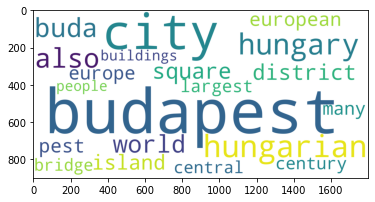

In [36]:
wc = WordCloud(width=1800, height=900, background_color="white",
               max_words = 20, relative_scaling = 0.5, 
               normalize_plurals = False).generate_from_frequencies(dict_bp)
plt.imshow(wc)

In [38]:
"""
# Using the csv library to export it
import csv

with open('Output/Budapest_counter.csv', 'w') as csv_file:
    writer = csv.writer(csv_file, delimiter=';')
    writer.writerow(['word','frequency'])
    for key, value in dict_counts.items():
       writer.writerow([key, value])
"""

"\n# Using the csv library\nimport csv\n\nwith open('Output/Budapest_counter.csv', 'w') as csv_file:\n    writer = csv.writer(csv_file, delimiter=';')\n    writer.writerow(['word','frequency'])\n    for key, value in dict_counts.items():\n       writer.writerow([key, value])\n"

With Python we can open, read and write other types of files. One of them is `pdf` format. While we can read pdfs we cannot write pdf from scratch, we only write content that is already in pdf format. To do this, we'll use another third party module called PyPDF2. 